# Drawing for vector fields

For vector fields, there are special drawings. Here we explain how to extract information from these drawings

In [1]:
from diffractio import degrees, mm, nm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY

from diffractio.utils_drawing import concatenate_drawings, draw_several_fields

In [2]:
length = 500 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-200 * um, 200 * um, 512)
y0 = np.linspace(-200 * um, 200 * um, 512)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(A=1, r0=(0, 0), w0=100 * um, z0=0)

EM = Vector_source_XY(x0, y0, wavelength)
EM.azimuthal_wave(u=u0, r0=(0, 0), radius=(200, 200))
EM.VRS(z=10 * mm, new_field=False)
EM.normalize()

Ex, Ey, _ = EM.get()

EM.reduce_matrix = ''


**Draw intensity**

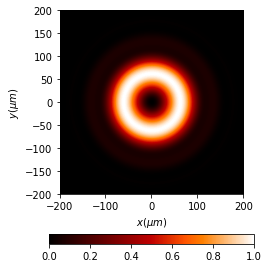

In [3]:
EM.draw(kind='intensity')


**Draw intensities**

If the Ez field presents intensity, it is also shown

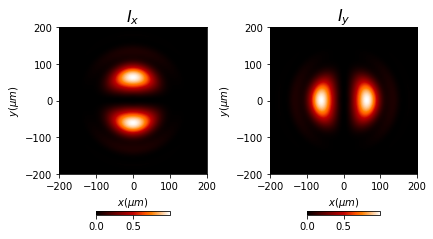

In [4]:
EM.draw(kind='intensities')


**Draw phase**

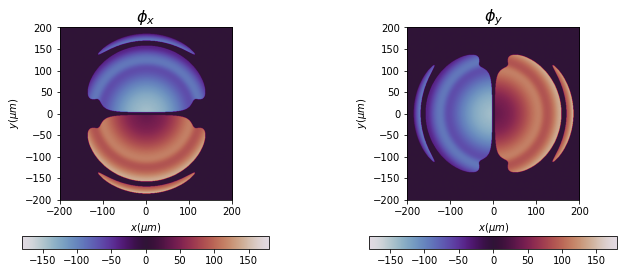

In [5]:
EM.draw(kind='phases')


**Draw field**

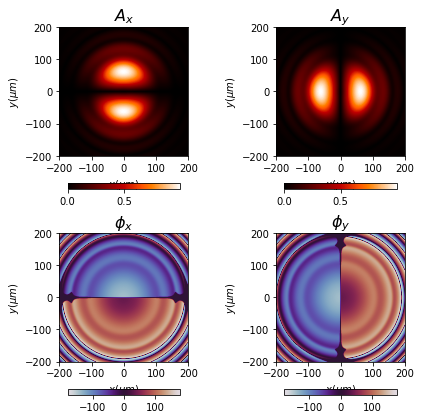

In [6]:
EM.draw(kind='fields')

**Draw Stokes**

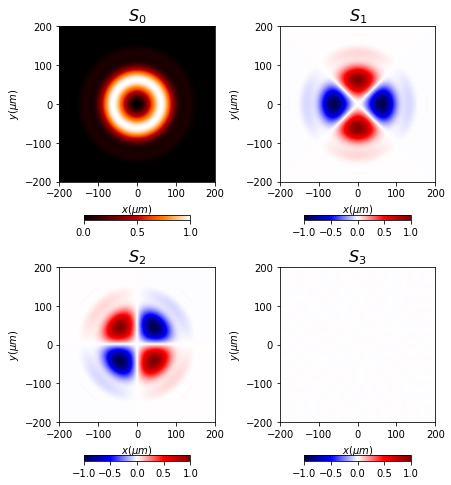

In [7]:
EM.draw(kind='stokes')


**Draw polarization ellipses parameters**

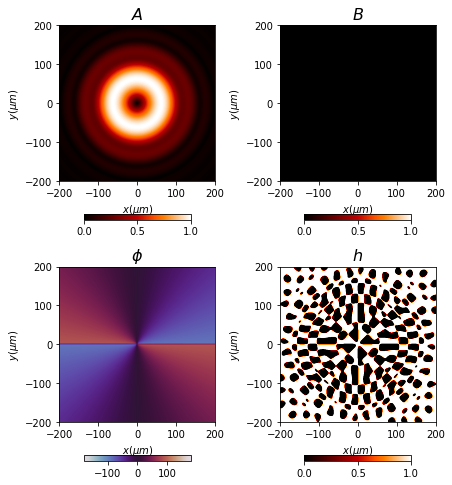

In [8]:
EM.draw(kind='param_ellipse')


**Draw intensity with polarization vectors**

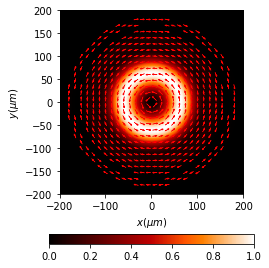

In [9]:
EM.__draw_ellipses__(logarithm=False,
                     normalize=False,
                     cut_value=False,
                     num_ellipses=(30, 30),
                     amplification=0.75,
                     color_line='r',
                     line_width=.5,
                     draw_arrow=True,
                     head_width=2,
                     ax=False)


This polarizaation ellipses can also be drawn at any other drawing, provided that we have the axis associated to this drawing

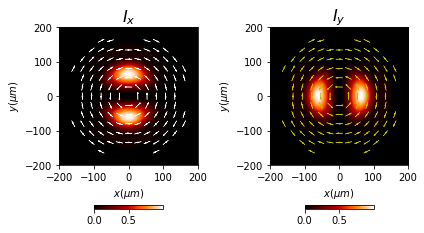

In [11]:
h1, h2 = EM.draw(kind='intensities')
EM.__draw_ellipses__(logarithm=False,
                     normalize=False,
                     cut_value=False,
                     num_ellipses=(15, 15),
                     amplification=0.75,
                     color_line='w',
                     line_width=.5,
                     draw_arrow=True,
                     head_width=2,
                     ax=h1)

EM.__draw_ellipses__(logarithm=False,
                     normalize=False,
                     cut_value=False,
                     num_ellipses=(15, 15),
                     amplification=0.75,
                     color_line='y',
                     line_width=.5,
                     draw_arrow=True,
                     head_width=2,
                     ax=h2)
plt.tight_layout()